In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, plot_confusion_matrix

In [2]:
y_train = np.random.binomial(1, 0.9, (20, 1))
f = lambda y: np.array(list(y)*4)
x_train = np.array([np.random.normal(0, 0.5, size = (4,)) + f(y) for y in y_train])

In [3]:
y_test = np.random.binomial(1, 0.5, (1000, 1))
x_test = np.array([np.random.normal(0, 0.5, size = (4,)) + f(y) for y in y_test])

In [4]:
y_unlabeled = np.random.binomial(1, 0.1, (950, 1))
x_unlabeled = np.array([np.random.normal(0, 0.5, size = (4,)) + f(y) for y in y_unlabeled])

Train f1 Score: 0.9444444444444444
Test f1 Score: 0.8165584415584416


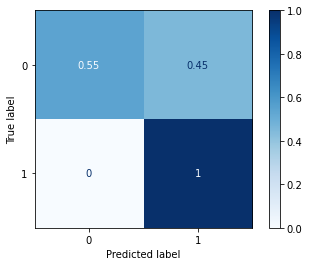

In [5]:
cl_initial = LogisticRegression(max_iter=1000)
cl_initial.fit(x_train, y_train)
y_hat_test = cl_initial.predict(x_test)
y_hat_train = cl_initial.predict(x_train)

train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(cl_initial, x_test, y_test, cmap='Blues', normalize='true',\
     display_labels=[0, 1])

In [6]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 
max_iter = 20
# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0 and iterations < max_iter:
        
    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(x_train, y_train)
    y_hat_train = clf.predict(x_train)
    y_hat_test = clf.predict(x_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(x_unlabeled)
    preds = clf.predict(x_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    
    
    # Separate predictions with > 99% probability
    high_prob = np.logical_or(( prob_0 > 0.99 ), (prob_1 > 0.99))
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    x_train = np.concatenate([x_train, x_unlabeled[high_prob]], axis=0)
    y_train = np.concatenate([y_train, preds[high_prob].reshape(-1, 1)])      
    
    # Drop pseudo-labeled instances from unlabeled data
    x_unlabeled = x_unlabeled[np.logical_not(high_prob)]
    print(f"{len(x_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.9444444444444444
Test f1: 0.8165584415584416
Now predicting labels for unlabeled data...
950 high-probability predictions added to training data.
947 unlabeled instances remaining.

Iteration 1
Train f1: 0.9523809523809523
Test f1: 0.8165584415584416
Now predicting labels for unlabeled data...
947 high-probability predictions added to training data.
947 unlabeled instances remaining.

Iteration 2
Train f1: 0.9523809523809523
Test f1: 0.8165584415584416
Now predicting labels for unlabeled data...
947 high-probability predictions added to training data.
947 unlabeled instances remaining.

Iteration 3
Train f1: 0.9523809523809523
Test f1: 0.8165584415584416
Now predicting labels for unlabeled data...
947 high-probability predictions added to training data.
947 unlabeled instances remaining.

Iteration 4
Train f1: 0.9523809523809523
Test f1: 0.8165584415584416
Now predicting labels for unlabeled data...
947 high-probability predictions added to training data.
947 un

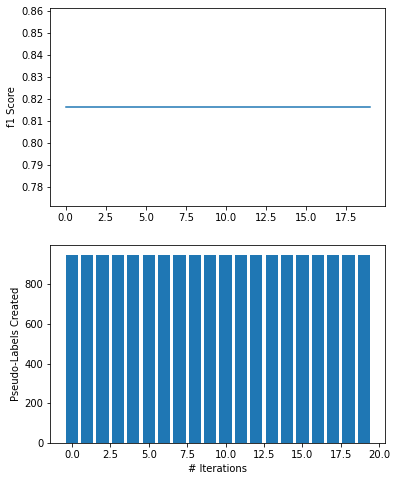

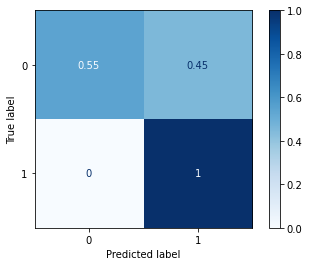

In [7]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations')

# View confusion matrix after self-training

plot_confusion_matrix(clf, x_test, y_test, cmap='Blues', normalize='true',\
                     display_labels=[0, 1])